In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df_sports_predictions = pd.read_csv("R_nn/nn_outputs/sports_nn_results.csv", index_col=0)
df_athletics_predictions = pd.read_csv("R_nn/nn_outputs/athletics_nn_results.csv", index_col=0)

In [5]:
df_sports_predictions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17925 entries, 1 to 17925
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   predicted_labels  17925 non-null  object
 1   test_labels       17925 non-null  object
dtypes: object(2)
memory usage: 420.1+ KB


In [6]:
df_sports_predictions["is_correct"] = df_sports_predictions["test_labels"] == df_sports_predictions['predicted_labels']
df_counts = df_sports_predictions.groupby(["test_labels", "is_correct"]).size().reset_index(name="count")

total_counts = df_sports_predictions.groupby('test_labels').size()
correct_counts = df_sports_predictions[df_sports_predictions['test_labels'] == df_sports_predictions['predicted_labels']].groupby("test_labels").size()

# Compute the percentage of correct predictions
accuracy = (correct_counts / total_counts * 100).fillna(0).reset_index()
accuracy.columns = ['correct_label', 'accuracy_percentage']

accuracy

,correct_label,accuracy_percentage
0,Cycling,2.824134
1,Fencing,0.153453
2,Gymnastics,57.916591
3,Rowing,1.226994
4,Swimming,87.431404


In [8]:
df_athletics_predictions["is_correct"] = df_athletics_predictions["test_labels"] == df_athletics_predictions['predicted_labels']
df_counts = df_athletics_predictions.groupby(["test_labels", "is_correct"]).size().reset_index(name="count")

total_counts = df_athletics_predictions.groupby('test_labels').size()
correct_counts = df_athletics_predictions[df_athletics_predictions['test_labels'] == df_athletics_predictions['predicted_labels']].groupby("test_labels").size()

# Compute the percentage of correct predictions
accuracy = (correct_counts / total_counts * 100).fillna(0).reset_index()
accuracy.columns = ['correct_label', 'accuracy_percentage']

accuracy

,correct_label,accuracy_percentage
0,Field,68.026644
1,Jump,1.708706
2,Long,42.876344
3,Mid,1.506373
4,Short,77.037799


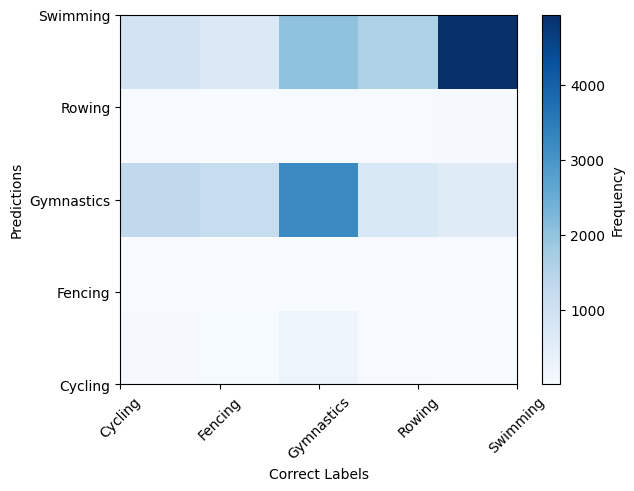

In [10]:
sorted_labels = np.sort(df_sports_predictions["test_labels"].unique())

index_dict = {label: i for i, label in enumerate(sorted_labels)}

df_sports_predictions["labels_indexed"] = df_sports_predictions["test_labels"].map(index_dict)
df_sports_predictions["predictions_indexed"] = df_sports_predictions["predicted_labels"].map(index_dict)

plt.hist2d(df_sports_predictions["labels_indexed"], df_sports_predictions["predictions_indexed"], bins=5, cmap=plt.cm.Blues, density=False)


plt.xticks(ticks=np.arange(len(sorted_labels)), labels=sorted_labels, rotation=45)
plt.yticks(ticks=np.arange(len(sorted_labels)), labels=sorted_labels)

# Add labels and title
plt.xlabel('Correct Labels')
plt.ylabel('Predictions')

# Add a colorbar to show the frequency scale
plt.colorbar(label='Frequency')

# Show the plot
plt.show()

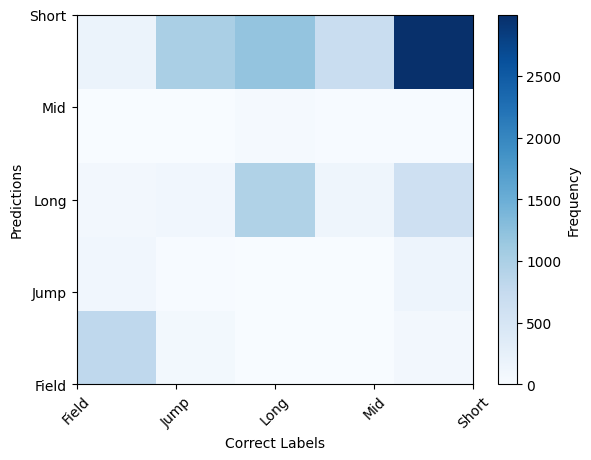

In [11]:
sorted_labels = np.sort(df_athletics_predictions["test_labels"].unique())

index_dict = {label: i for i, label in enumerate(sorted_labels)}

df_athletics_predictions["labels_indexed"] = df_athletics_predictions["test_labels"].map(index_dict)
df_athletics_predictions["predictions_indexed"] = df_athletics_predictions["predicted_labels"].map(index_dict)

plt.hist2d(df_athletics_predictions["labels_indexed"], df_athletics_predictions["predictions_indexed"], bins=5, cmap=plt.cm.Blues, density=False)


plt.xticks(ticks=np.arange(len(sorted_labels)), labels=sorted_labels, rotation=45)
plt.yticks(ticks=np.arange(len(sorted_labels)), labels=sorted_labels)

# Add labels and title
plt.xlabel('Correct Labels')
plt.ylabel('Predictions')

# Add a colorbar to show the frequency scale
plt.colorbar(label='Frequency')

# Show the plot
plt.show()